In [ ]:
!pip install pandas_datareader

In [ ]:
!pip install yfinance

In [67]:
import yfinance as yf
yf.pdr_override()

import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

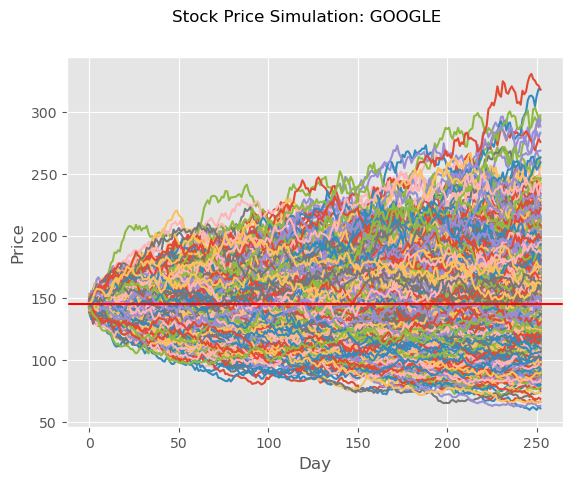

In [72]:
start = '2014-01-01'
end = '2022-01-01'
symbol = 'GOOGL'

prices = yf.Ticker(symbol)
prices = prices.history(start=start, end=end)['Close'] 

returns = prices.pct_change()

last_price = prices[-1]

num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 252:
            break
        
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        
        count += 1

    price_series = pd.Series(price_series)
    simulation_df = pd.concat([simulation_df, price_series], axis=1)

fig = plt.figure()
fig.suptitle('Stock Price Simulation: GOOGLE')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()